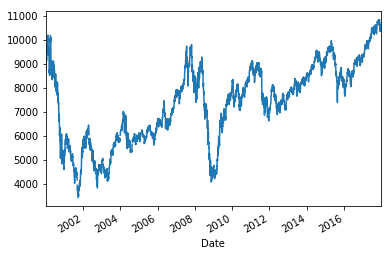

In [4]:
# https://koreal6803.github.io/%E5%88%A9%E7%94%A8Pandas%E8%BC%95%E9%AC%86%E5%8F%96%E5%BE%97%E6%AD%B7%E5%8F%B2%E8%82%A1%E5%83%B9/

from pandas_datareader import data 
import matplotlib.pyplot as plt    
import pandas as pd              
%matplotlib inline  

# get data from yahoo
data = data.DataReader("^TWII", "yahoo", "2000-01-01","2018-01-01")
c = data['Close']
c.plot()

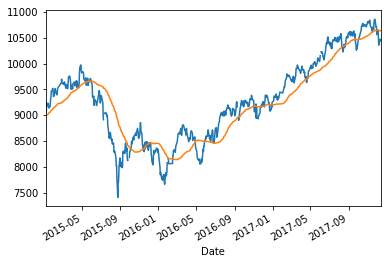

In [4]:
# add 60ma
c60 = c.rolling(60, min_periods=1).mean() # 近60日收盤
c['2015':].plot()
c60['2015':].plot()

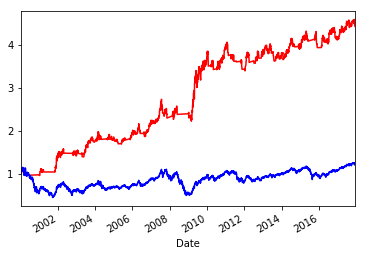

In [5]:
# 買入訊號
signal = (c > c60)
# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

In [7]:
# 每日股價變化率
data = pd.DataFrame({'c':c, 'c60':c60, '增長率':c.shift(-1)/c, 'signal':signal}).head()
data

,c,c60,signal,增長率
Date,,,,
2000-01-04,8756.549805,8756.549805,False,1.010657
2000-01-05,8849.870117,8803.209961,True,1.008154
2000-01-06,8922.030273,8842.816732,True,0.991912
2000-01-07,8849.870117,8844.580078,True,1.028557
2000-01-10,9102.599609,8896.183984,True,0.980712
